In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = '/Users/abrahamn/Documents/Physics/papers/DishPapers/data/'
visdat = np.load(d+'HERA-19_FG_delay_spectra.npz')

#'freqs': simulation frequencies (in Hz) of size 128
#'lags': simulated delays (in s) of size 256
#'baselines': simulated baseline vectors (in m) for HERA-19 of size 30x3
#'lst': simulated LST (in degrees, may ned to be wrapped by 360.0) of size 4
#'chromatic_skyvis_freq': visibilities (in Jy) of size 30x128x4 simulated
with chromatic CST beam
#'chromatic_cc_skyvis_lag': cleaned delay spectra of simulated visibilities
(in Jy Hz) of size 30x256x4 using chromatic beam
#'achromatic_skyvis_freq': visibilities (in Jy) of size 30x128x4 simulated
#with achromatic CST beam
#'achromatic_cc_skyvis_lag': cleaned delay spectra of simulated
visibilities (in Jy Hz) of size 30x256x4 using achromatic beam

In [3]:
visdat.files

['freqs',
 'lags',
 'lst',
 'chromatic_skyvis_freq',
 'achromatic_cc_skyvis_lag',
 'chromatic_cc_skyvis_lag',
 'baselines',
 'achromatic_skyvis_freq']

In [14]:
freqs = visdat['freqs']
dfHz = freqs[1]-freqs[0]

desiredcenterfreq = 150.e6
desiredcenterindex = int((desiredcenterfreq-freqs[0])/dfHz)
bandbandwidth = 20.e6 # Hz
desirednfreqs = bandbandwidth/dfHz
desiredindices = arange(len(freqs))[arange(int(desiredcenterindex-desirednfreqs/2),int(desiredcenterindex+desirednfreqs/2))]

bandfreqs = freqs[desiredindices]
numbandfreqs = len(bandfreqs)
dfHz = bandfreqs[1]-bandfreqs[0]
centerbandfreq = mean(bandfreqs)
centerbandlamda = 3.e8/centerbandfreq

z = 1420.e6/centerbandfreq-1
Ez = sqrt(.3*(1+z)**3+.7)

In [15]:
# Theory power spectrum from Zaki's PAPER-64 paper
theorydat2 = genfromtxt('/Users/abrahamn/Documents/Physics/papers/beamforming_errors_in_mwa_tiles/model_power_spectrum8_4.txt',skip_header=2)
theorykpara2 = theorydat2[:,0]
theorypowerspectrum2 = theorydat2[:,1]/abs(theorykpara2)**3*(2*pi**2)
theorydelays2 = theorykpara2*(1+z)**2/(H0overc*2*pi*1420.e6*Ez)*1.e9

# Theory power spectrum generated by Aaron
theorydat = genfromtxt('/Users/abrahamn/Documents/Physics/papers/beamforming_errors_in_mwa_tiles/aaron_theory_power_spectrum.txt',skip_header=2)
theorykpara = theorydat[:,0]
theorypowerspectrum = theorydat[:,1]/abs(theorykpara)**3*(2*pi**2)

theorydelays = theorykpara*(1+z)**2/(H0overc*2*pi*1420.e6*Ez)*1.e9

#blhorizondelayns = array(blmeters)*3.28
datadelays = roll(fft.fftfreq(numbandfreqs, d=dfHz),numbandfreqs/2)*1.e9 # df as defined above i
datakpara = datadelays*1.e-9*(H0overc*2*pi*1420.e6*Ez)/(1+z)**2

In [25]:
# See Section 2 of http://iopscience.iop.org/0004-637X/804/1/14/pdf/0004-637X_804_1_14.pdf
# for details on conversion from FFT of visibilities to cosmological power spectrum units

import scipy.signal

kb=1.38e-23 # J/K
D = 9285.5 # LOS comoving distance to z=8.5
H0overc = 2.335e-4 # 1/Mpc

def vis_to_delay_spec(vis,A):
    wind = scipy.signal.blackmanharris(numbandfreqs)
    vis_ft = roll(fft.fft(vis*wind),numbandfreqs/2)/sqrt(np.mean(wind**2))
    
    deltaD = bandbandwidth/(150.e6*Ez*H0overc)
    units = D**2*deltaD*centerbandlamda**2/(bandbandwidth**2*4*kb**2)*(1.e-26*dfHz)**2#*1.e6
    
    datadelays = roll(fft.fftfreq(numbandfreqs, d=dfHz),numbandfreqs/2)*1.e9 # df as defined above i
    
    return datadelays,vis_ft*sqrt(units*A)

In [26]:
matplotlib.rcParams.update({'font.size': 18})

def plotjunk(ax,hordelay):
    # cosmology power spectra
    ax.semilogy(theorydelays,theorypowerspectrum*1.e-6,'k:',linewidth=2,label='1D theory')
    ax.semilogy(-theorydelays,theorypowerspectrum*1.e-6,'k:',linewidth=2)
    plt.legend(fontsize=10)

    # other plotting stuff
    ax.semilogy([-hordelay,-hordelay],[1.e-6,2.e18],'k-')
    ax.semilogy([hordelay,hordelay],[1.e-6,2.e18],'k-')
    plt.ylim([1.e-2,1.e11])
    plt.xlim([-1000.,1000.])
    plt.xlabel(r"$\tau$ (ns)")
    plt.ylabel(r"$P(k)$  $(\mathrm{Mpc}^3 \mathrm{K}^2)$")
    ax2 = ax.twiny()
    delayticks = ax.get_xticks()
    kparaticks = array([-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6])
    kparaticksdelays = kparaticks*(1+z)**2/(H0overc*2*pi*1420.e6*Ez)*1.e9
    ax2.set_xticks(kparaticksdelays)
    ax2.set_xbound(ax1.get_xbound())
    ax2.set_xticklabels(["%.1f"%kpara for kpara in kparaticks])
    ax2.set_xlabel(r"$k_\parallel$ $(\mathrm{Mpc}^{-1})$")

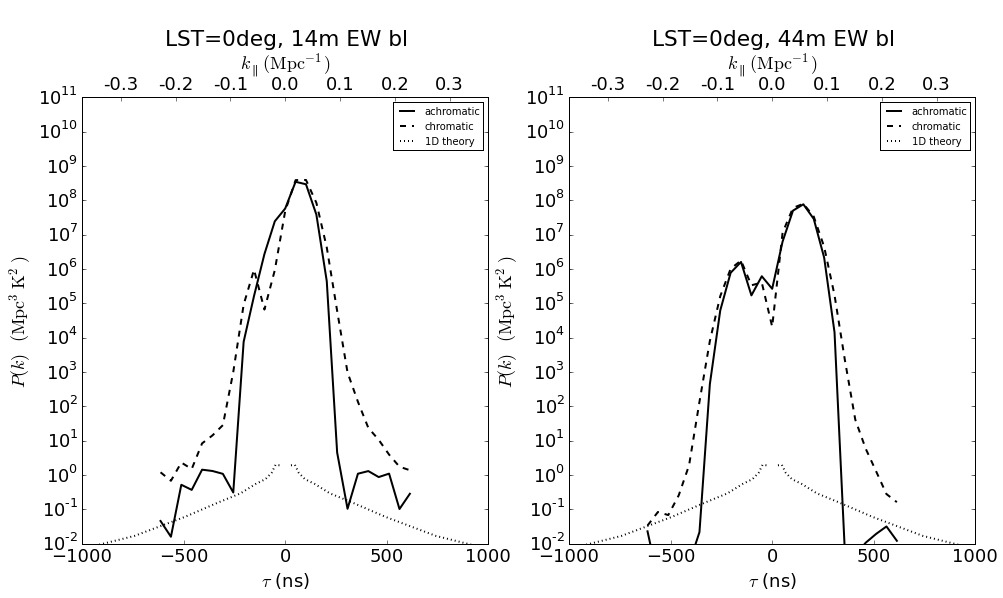

In [27]:
fig = plt.figure(num=None, figsize=(16, 8), dpi=80)

delays,vis_achromatic_delayspec_shortbl = vis_to_delay_spec(visdat['achromatic_skyvis_freq'][0,desiredindices,0],70)
delays,vis_chromatic_delayspec_shortbl = vis_to_delay_spec(visdat['chromatic_skyvis_freq'][0,desiredindices,0],70)

delays,vis_achromatic_delayspec_longbl = vis_to_delay_spec(visdat['achromatic_skyvis_freq'][17,desiredindices,0],70)
delays,vis_chromatic_delayspec_longbl = vis_to_delay_spec(visdat['chromatic_skyvis_freq'][17,desiredindices,0],70)

ax1 = fig.add_subplot(121)
ax1.semilogy(delays, abs(vis_achromatic_delayspec_shortbl)**2 ,'k-',linewidth=2,label='achromatic')
ax1.semilogy(delays, abs(vis_chromatic_delayspec_shortbl)**2 ,'k--',linewidth=2,label='chromatic')
plt.title('\nLST=0deg, 14m EW bl\n\n')
plotjunk(ax1,14*3*1000.)

ax11 = fig.add_subplot(122)
ax11.semilogy(delays, abs(vis_achromatic_delayspec_longbl)**2 ,'k-',linewidth=2,label='achromatic')
ax11.semilogy(delays, abs(vis_chromatic_delayspec_longbl)**2 ,'k--',linewidth=2,label='chromatic')
plt.title('\nLST=0deg, 44m EW bl\n\n')
plotjunk(ax11,44*3*1000.)